# **Make necessary assumptions and do push into the pulled repo with the generated outputs in the same file**

In [1]:
#Example Code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import numpy as np
import keras
import tensorflow
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_pts = 500
np.random.seed(0)
X,y=datasets.make_circles(n_samples=n_pts,random_state=123,noise=0.1,factor=0.2)


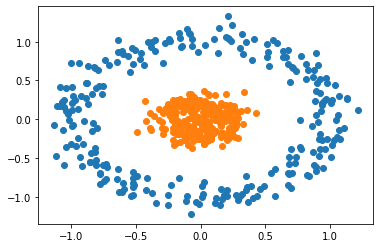

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

## **Above is the example code and its corresponding output....**

#Exploratory Data Analysis (Includes Graphs and other necessary operations)

In [4]:
import pandas as pd
weather_df = pd.read_csv("train.csv")

In [5]:

weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [6]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
weather_df.shape

(94268, 12)

In [8]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.0,94268.000000
mean,11.949454,10.872365,0.733875,10.838893,187.707907,10.355367,0.0,1002.864099
std,9.601178,10.752540,0.196034,6.950710,107.652333,4.172897,0.0,118.290080
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.527778,2.244444,0.600000,5.796000,114.000000,8.372000,0.0,1011.800000
50%,12.077778,12.077778,0.780000,10.014200,180.000000,10.046400,0.0,1016.330000
75%,18.866667,18.866667,0.890000,14.151900,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Cloud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

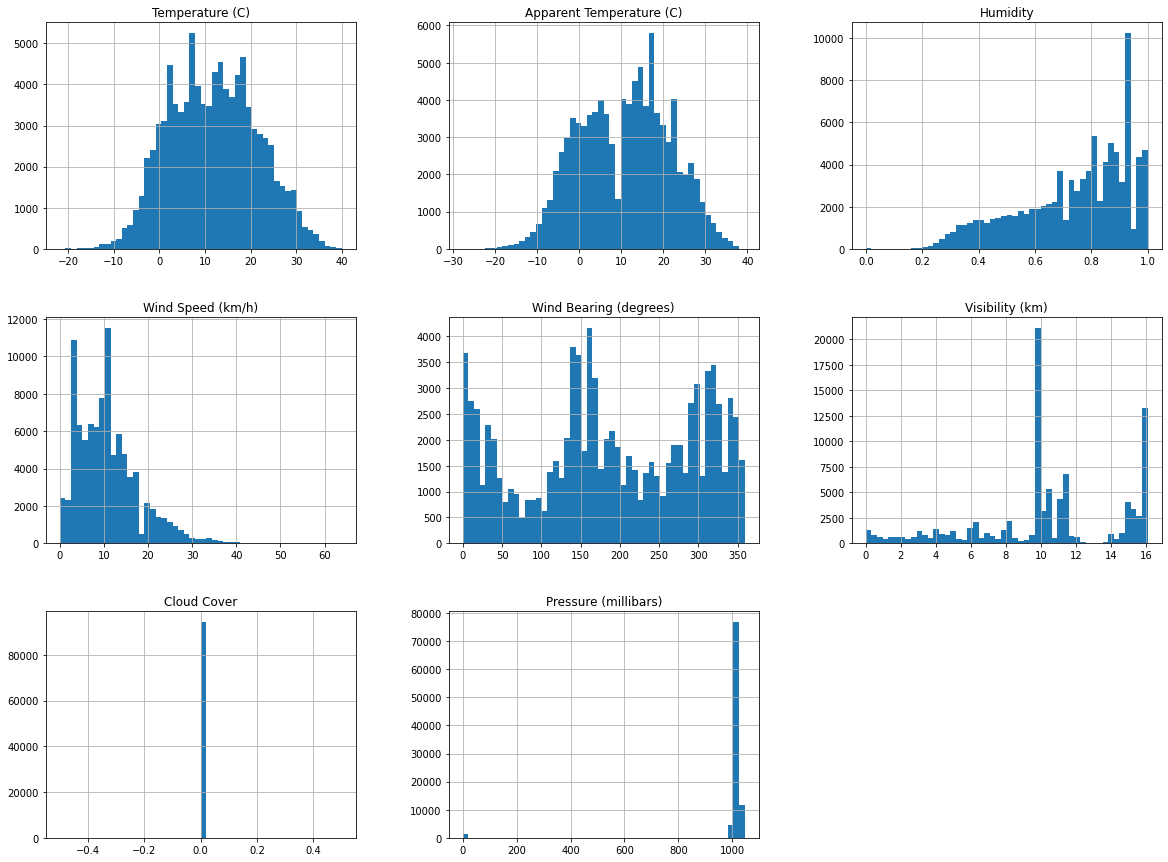

In [9]:
from matplotlib import pyplot as plt
weather_df.hist(bins=50,figsize=(20,15))

# # Feature Engineering


In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94268 entries, 0 to 94267
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            94268 non-null  object 
 1   Summary                   94268 non-null  object 
 2   Precip Type               94125 non-null  object 
 3   Temperature (C)           94268 non-null  float64
 4   Apparent Temperature (C)  94268 non-null  float64
 5   Humidity                  94268 non-null  float64
 6   Wind Speed (km/h)         94268 non-null  float64
 7   Wind Bearing (degrees)    94268 non-null  int64  
 8   Visibility (km)           94268 non-null  float64
 9   Cloud Cover               94268 non-null  int64  
 10  Pressure (millibars)      94268 non-null  float64
 11  Daily Summary             94268 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.6+ MB


In [11]:
weather_df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Cloud Cover                 False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [12]:
weather_df.isnull().all()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Cloud Cover                 False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [13]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)  # find the percentage

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.15
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Cloud Cover                 0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

In [14]:
weather_df['Precip Type'].value_counts()

rain    83413
snow    10712
Name: Precip Type, dtype: int64

In [15]:
weather_df.loc[weather_df['Precip Type'].isnull(),'Precip Type']='rain'  #replace with null value to rain

In [16]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Cloud Cover                 0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

In [17]:
weather_df.loc[weather_df['Precip Type']=='rain','Precip Type']=1
weather_df.loc[weather_df['Precip Type']=='snow','Precip Type']=0

In [18]:
weather_df_num = weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]

In [19]:
weather_y = weather_df_num.pop('Temperature (C)')
weather_x = weather_df_num

In [20]:
train_x,test_x,train_y,test_y = train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [21]:
train_x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
50046,17.138889,0.87,4.7334,244,11.2700,0,1020.50
69714,21.105556,0.35,14.2163,262,16.1000,0,1021.11
36311,16.105556,0.93,16.6152,309,11.6886,0,1011.87
16516,4.161111,0.87,6.9874,43,6.2468,0,1028.18
48965,-5.094444,0.92,4.6046,150,5.2164,0,1023.38


In [22]:
test_x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
80908,3.822222,0.99,0.6279,275,4.0894,0,1031.17
46510,-9.838889,0.99,5.9409,198,2.8175,0,1023.55
1316,15.000000,0.78,17.1626,310,10.3523,0,1018.92
3248,-21.777778,0.48,22.6044,20,11.2700,0,1036.59
74662,11.688889,0.71,6.2468,302,16.1000,0,1014.05


# Model and Accuracy Prediction on given test data

# Linear Regresion Model

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [24]:
prediction = model.predict(test_x)

In [25]:
np.mean((prediction-test_y)**2)   #error in model

0.9085106457296475

In [26]:
pd.DataFrame({'actual prediction':test_y,"prediction_we_did":prediction,"diff":(test_y-prediction)})

,actual prediction,prediction_we_did,diff
80908,3.822222,4.529370,-0.707148
46510,-6.838889,-6.949346,0.110457
1316,15.000000,15.940031,-0.940031
3248,-12.711111,-15.181115,2.470004
74662,11.688889,12.334534,-0.645645
...,...,...,...
15773,3.983333,3.480880,0.502453
58244,13.888889,16.662750,-2.773861
50480,1.161111,0.809150,0.351961
48374,26.916667,25.659998,1.256668


# Polynomial Regression Model

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(train_x)
poly.fit(x_poly,train_y)
lin = LinearRegression()
lin.fit(x_poly,train_y)

LinearRegression()

In [28]:
prediction_second = lin.predict(poly.fit_transform(test_x))
np.mean((prediction_second-test_y)**2)

0.14787060478902114

In [29]:
pd.DataFrame({'actual':test_y,'prediction':prediction_second,'differnece':test_y-prediction_second})

,actual,prediction,differnece
80908,3.822222,3.039705,0.782517
46510,-6.838889,-7.467157,0.628269
1316,15.000000,15.250406,-0.250406
3248,-12.711111,-13.305673,0.594562
74662,11.688889,11.912827,-0.223938
...,...,...,...
15773,3.983333,3.663791,0.319543
58244,13.888889,14.473907,-0.585018
50480,1.161111,0.984612,0.176499
48374,26.916667,27.197902,-0.281235


# DecisionTree

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(random_state=0)

In [31]:
prediction_third = regressor.predict(test_x)

In [32]:
np.mean((prediction_third-test_y)**2)

0.006366175370728088

In [33]:
pd.DataFrame({'actual':test_y,'prediction':prediction_third,'differnece':test_y-prediction_third})

,actual,prediction,differnece
80908,3.822222,3.822222,0.000000e+00
46510,-6.838889,-6.622222,-2.166667e-01
1316,15.000000,15.000000,0.000000e+00
3248,-12.711111,-12.666667,-4.444444e-02
74662,11.688889,11.688889,0.000000e+00
...,...,...,...
15773,3.983333,3.955556,2.777778e-02
58244,13.888889,13.888889,-6.039613e-14
50480,1.161111,1.161111,0.000000e+00
48374,26.916667,26.994444,-7.777777e-02


# Random Forest Model


In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [35]:
prediction_fourh = regr.predict(test_x)
np.mean((prediction_fourh-test_y)**2)

0.008203689587759865

In [36]:
pd.DataFrame({'actual':test_y,'prediction':prediction_fourh,'differnece':test_y-prediction_fourh})

,actual,prediction,differnece
80908,3.822222,3.866323,-0.044100
46510,-6.838889,-6.673642,-0.165247
1316,15.000000,15.002208,-0.002208
3248,-12.711111,-12.407075,-0.304036
74662,11.688889,11.688637,0.000252
...,...,...,...
15773,3.983333,3.907434,0.075899
58244,13.888889,13.888818,0.000071
50480,1.161111,1.162271,-0.001159
48374,26.916667,27.073248,-0.156582


In [37]:
regr_two = RandomForestRegressor(max_depth=50,random_state=0,n_estimators=100)
regr_two.fit(train_x,train_y)

RandomForestRegressor(max_depth=50, random_state=0)

In [38]:
prediction_fifth = regr.predict(test_x)
np.mean((prediction_fifth-test_y)**2)

0.008203689587759865

In [40]:
from joblib import dump,load
dump(regressor,'Hustlers.joblib')

['Hustlers.joblib']